In [ ]:
pip install gensim nltk


In [ ]:
!pip install tomotopy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 54.1 MB/s eta 0:00:00


In [ ]:
!pip install little_mallet_wrapper

In [ ]:
import tomotopy as tp
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path


In [ ]:
import zipfile
import os
import shutil
import nltk
from nltk.tokenize import sent_tokenize
import gensim
from gensim import corpora

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def extract_sentences_with_keywords(file_content, keywords):
    sentences = []
    text = file_content.decode('utf-8')
    sentences.extend(re.findall(r'[^.]*?\b(?:' + '|'.join(keywords) + r')\b[^.]*\.', text))
    return sentences


In [ ]:
def extract_sentences_with_keywords_from_zip(zip_path, keywords):
    file_sentences = {}
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        for file_info in zip_ref.infolist():
            with zip_ref.open(file_info) as file:
                content = file.read()
                file_sentences[file_info.filename] = extract_sentences_with_keywords(content, keywords)
    return file_sentences


In [ ]:
# Upload the zip file to Google Colab and provide its path
zip_file_path = "/content/Archive2.zip"


In [ ]:
# Specify the directory where you want to extract the contents
extracted_dir_path = "/content/extracted/Archive2/Archive2"

In [ ]:
# Create the directory if it doesn't exist
os.makedirs(extracted_dir_path, exist_ok=True)

In [ ]:
# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

In [ ]:
print("File extracted successfully!")

File extracted successfully!


In [ ]:

# Function to extract sentences containing keywords
def extract_sentences_with_keywords(file_path, keywords):
    sentences_with_keywords = []
    with open(file_path, 'r', encoding='latin-1') as file:
        text = file.read()
        sentences = sent_tokenize(text)
        for sentence in sentences:
            if any(keyword in sentence.lower() for keyword in keywords):
                sentences_with_keywords.append(sentence)
    return sentences_with_keywords


In [ ]:
# List of keywords
keywords = ["mission", "church"]


In [ ]:
# Directory containing the extracted files
extracted_files = os.listdir(extracted_dir_path)

In [ ]:
# Extract sentences containing the keywords from each file
for file_name in extracted_files:
    file_path = os.path.join(extracted_dir_path, file_name)
    if os.path.isfile(file_path):
        sentences_with_keywords = extract_sentences_with_keywords(file_path, keywords)
        if sentences_with_keywords:
            print(f"Sentences containing keywords in {file_name}:")
            for sentence in sentences_with_keywords:
                print(sentence)
            print("\n")

Sentences containing keywords in Chan, Meijean.txt:
Across the street from the first restaurant was St. Paulâs Episcopal Church and then across the street from the restaurant and one block up was the First Baptist Church and those buildings are still there.
The Baptist Church is now a restaurant, so we would go over to the park.
We had friends that we eventually, as probably Junior High, when we began going to the Chinese Community Church.
Prior to that, our friends were church friends at St. Paulâs Episcopal Church.
And, ummm, we were in the youth groups for, my sister 

and I were in the youth group for both churches.
Mc: Actually the thing that was probably most meaningful to me as a youngster was 

my going to St. Paulâs Episcopal Church.
hi 

Mc: Well, they lucked out because we were involved in church groups.
That's why, I think, they started having us go to the Chinese Community Church.
when we started going to the Chinese Community Church, the same thing " happened and th

In [ ]:
# process texts with the function little_mallet_wrapper.process_string().:

training_data = []
original_texts = []
titles = []

for file_name in extracted_files:
    file_path = os.path.join(extracted_dir_path, file_name)
    if os.path.isfile(file_path):
        sentences_with_keywords = extract_sentences_with_keywords(file_path, keywords)
        text =''
        for sentence in sentences_with_keywords:
          text = os.path.join(text, sentence)
          processed_text = little_mallet_wrapper.process_string(text, numbers='remove')
          training_data.append(processed_text)
          original_texts.append(text)
          titles.append(Path(text).stem)

In [ ]:
# Number of topics to return
num_topics = 20
# Numer of topic words to print out
num_topic_words = 15

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 20 times
iterations = 20
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')

print("\nTopic Model Results:\n\n")
# Print out top 10 words for each topic
topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")

Topic Model Training...


Iteration: 0	Log-likelihood: -5.332191103585532
Iteration: 20	Log-likelihood: -5.1289493345310175
Iteration: 40	Log-likelihood: -4.995522121325756
Iteration: 60	Log-likelihood: -4.895030869068843
Iteration: 80	Log-likelihood: -4.874881729798765

Topic Model Results:


✨Topic 0✨

court commissioner sergeant chinese called two evangelical school judge matters kind ground basement conducted portion

✨Topic 1✨

church chinese lim confucian send children like page tucson located china religion philosophy believe temple

✨Topic 2✨

chinese san diego francisco born california time law five history dormitory established sunday building october

✨Topic 3✨

church chinese friends would community /and began attend sister think actually /hi involved lucked /that

✨Topic 4✨

church chinese would meet children went /lt well school sundays mission wan bring pick areas

✨Topic 5✨

mission church chinese english around know remember even ships went /the learn donâ one /jf

✨To

In [ ]:
import matplotlib.pyplot as plt

In [ ]:

# Topics
topics = {
    "Topic 0": "court commissioner sergeant chinese called two evangelical school judge matters kind ground basement conducted portion",
    "Topic 1": "church chinese lim confucian send children like page tucson located china religion philosophy believe temple",
    "Topic 2": "chinese san diego francisco born california time law five history dormitory established sunday building october",
    "Topic 3": "church chinese friends would community /and began attend sister think actually /hi involved lucked /that",
    "Topic 4": "church chinese would meet children went /lt well school sundays mission wan bring pick areas",
    "Topic 5": "mission church chinese english around know remember even ships went /the learn donâ one /jf",
    "Topic 6": "chinese called like /the san presbyterian francisco valley place /in want without /during stories taught",
    "Topic 7": "church chinese /qp like /st tong commerce chamber /did chee kung say represent street /that",
    "Topic 8": "church china went government christian beijing baptized bush going last know group course three /that",
    "Topic 9": "restaurant first paulâ episcopal street going across baptist church probably youth still groups thing one",
    "Topic 10": "church born name san see /jh together though centered /it john ell hom project /now",
    "Topic 11": "church chinese baptist would mission didn attend father english got caucasian going went belonged /we",
    "Topic 12": "mission church first people street market time always far property involved city went came bible",
    "Topic 13": "chinese diego community started people church back /so san george pastor history small american /we",
    "Topic 14": "chinese mission always know old help clean cook got remember missionary mrs attend /things behind",
    "Topic 15": "church /ml school yeah /rh well used take /we went first avenue mission seems somebody",
    "Topic 16": "church chinese first community mission please avenue name fanton congregational /we /so mrs school let",
    "Topic 17": "year /the surprised like know mission right regular /so week first old dormitory offered well",
    "Topic 18": "church mission school early years /the community street people classes exclusion men lot right like",
    "Topic 19": "swimming mission chinese wood cords san xavier pools pool furbanks paul called wagons especially day"
}

# Splitting words in each topic and creating a dictionary with word frequencies
word_freq = {}
for topic, words in topics.items():
    word_list = words.split()
    word_freq[topic] = {}
    for word in word_list:
        if word in word_freq[topic]:
            word_freq[topic][word] += 1
        else:
            word_freq[topic][word] = 1

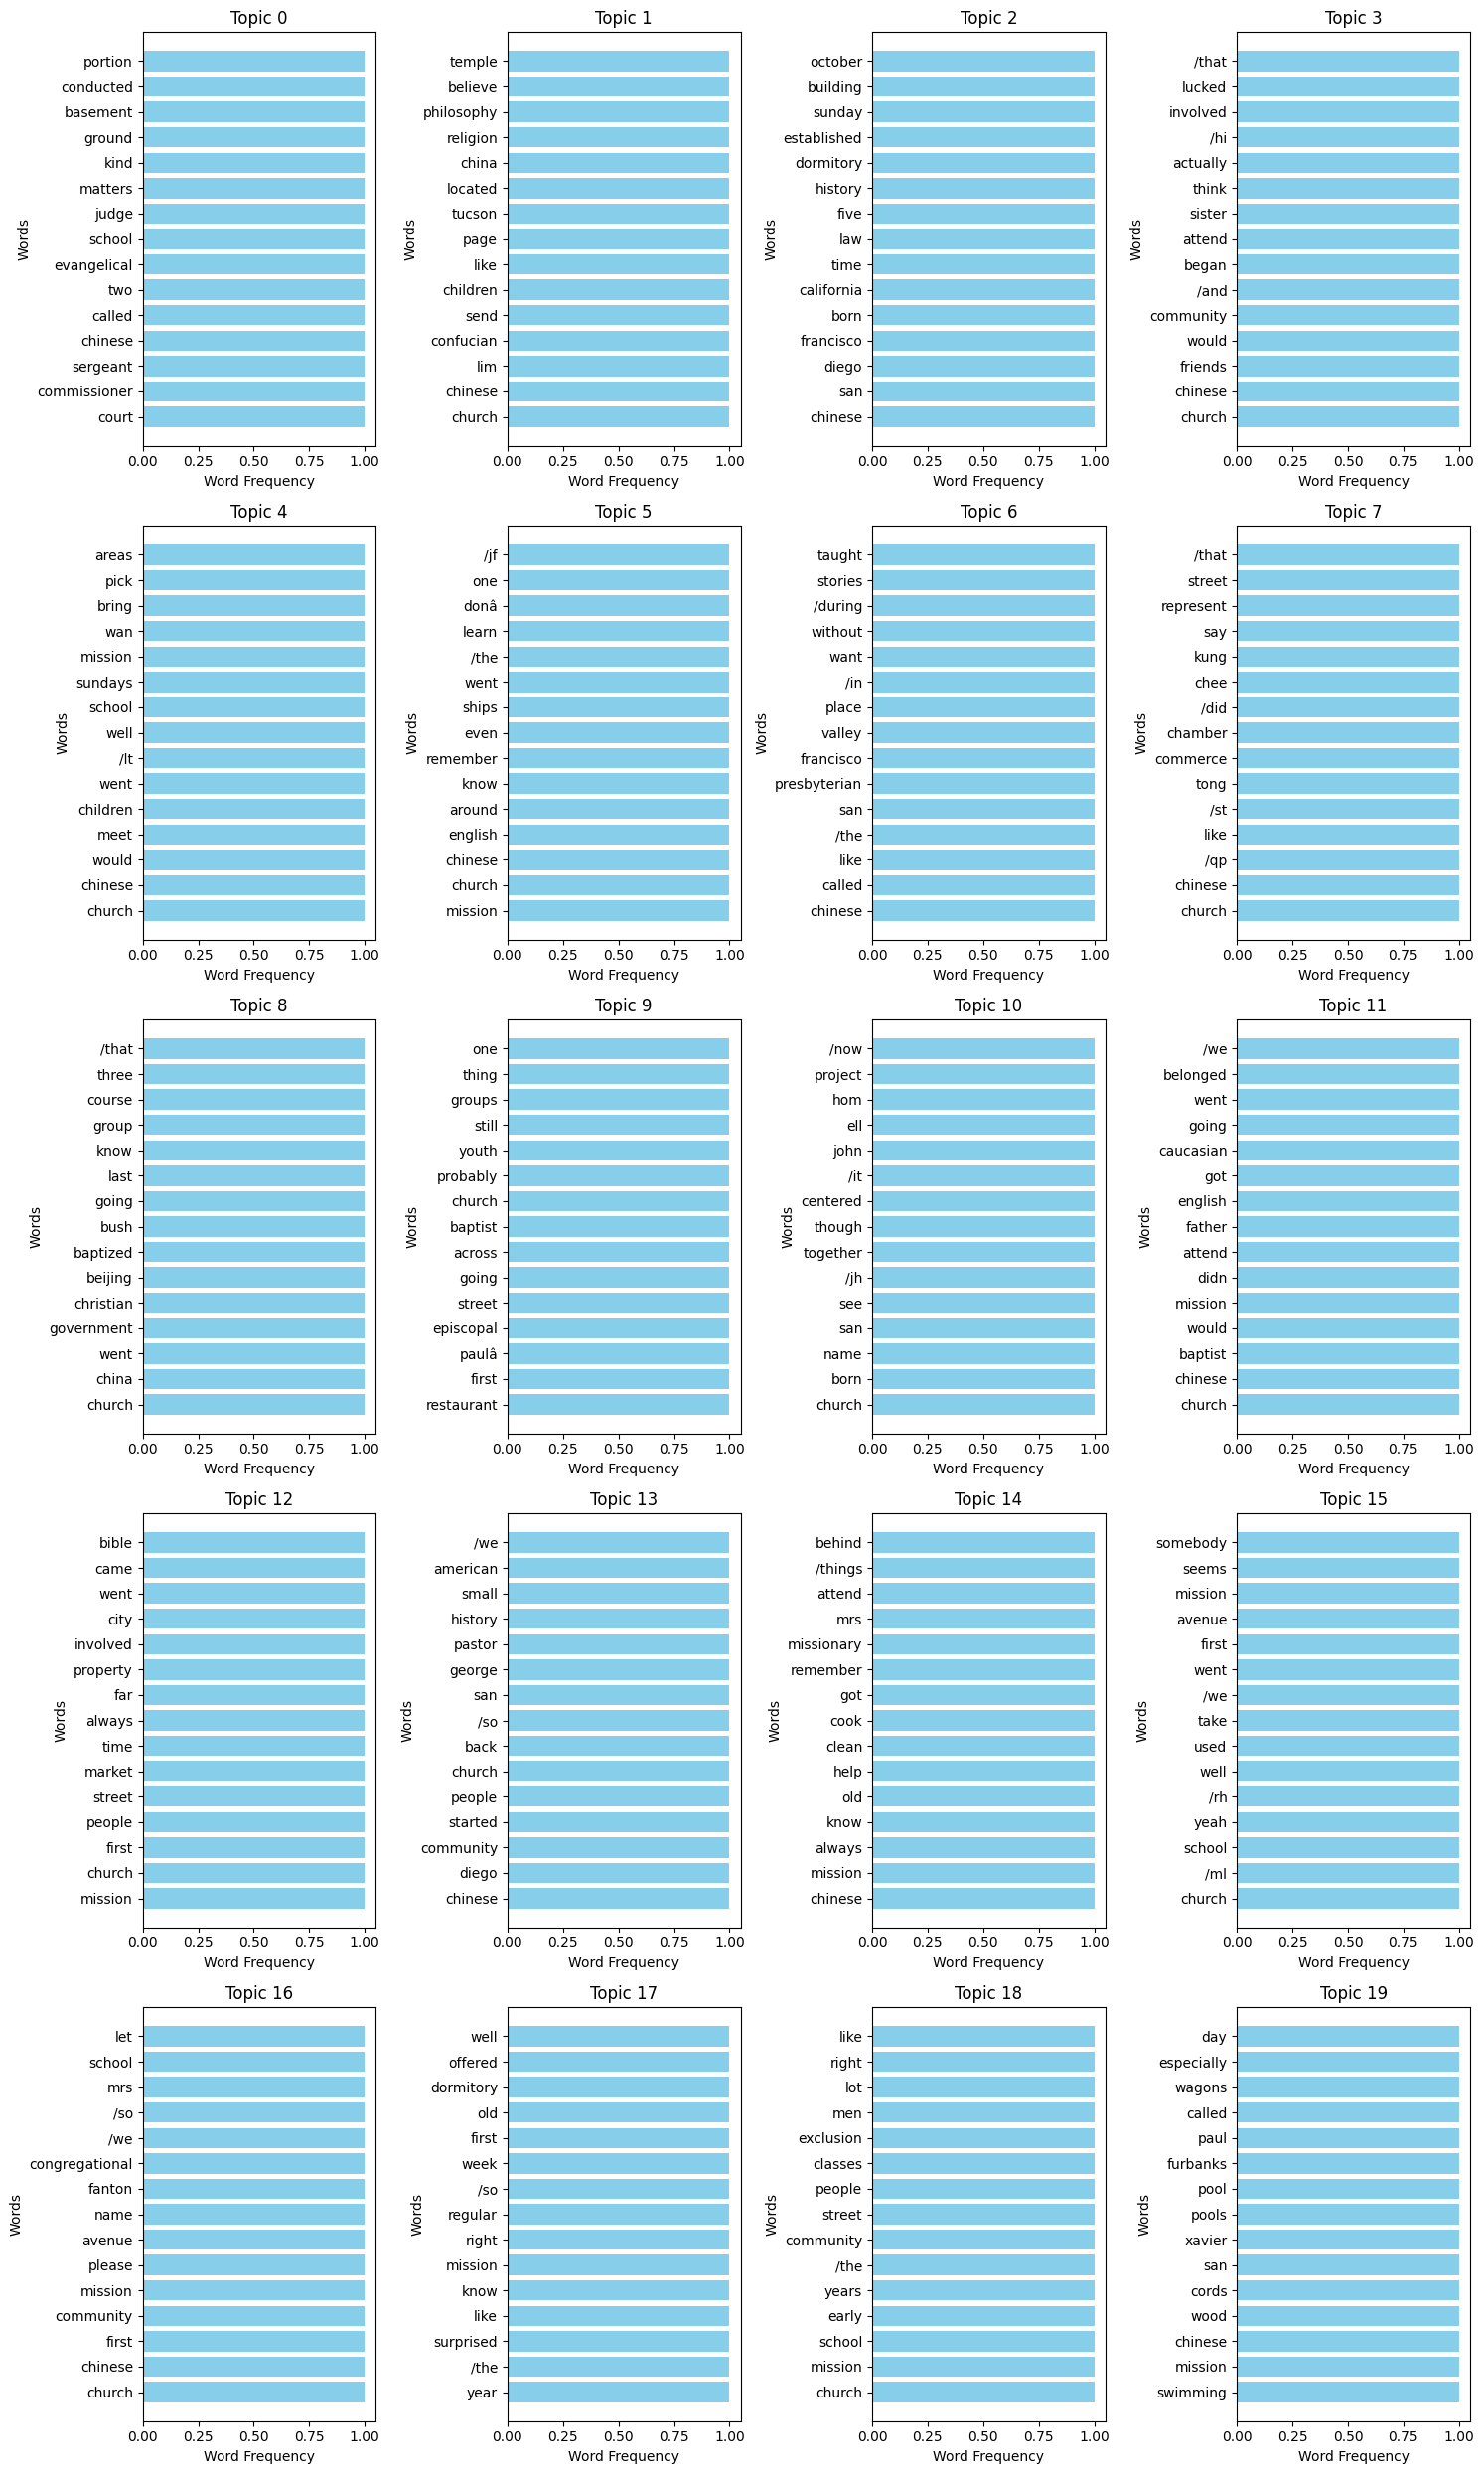

In [ ]:
# Plotting bar charts
plt.figure(figsize=(15, 25))
for i, (topic, freq) in enumerate(word_freq.items()):
    plt.subplot(5, 4, i+1)
    plt.barh(list(freq.keys()), freq.values(), color='skyblue')
    plt.title(topic)
    plt.xlabel('Word Frequency')
    plt.ylabel('Words')

plt.tight_layout()
plt.show()